In [1]:
import pandas as pd
import numpy as np

# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# print(module_path)
# sys.path.append(module_path)
import model.parts.utils as utils
from model.sys_params import *
df = pd.read_pickle(r'experiment.p')

stakeDelegateds: 605 events
stakeDelegatedLockeds: 375 events
stakeDelegatedWithdrawns: 326 events
allocationCloseds: 47 events
allocationCollecteds: 16 events
stakeDepositeds: 25 events
rewardsAssigneds: 47 events
delegationParametersUpdateds: 6 events
allocationCreateds: 51 events
TOTAL NUMBER OF EVENTS: 1529
You should set SIMULATION_TIME_STEPS in config.py to a minimum of 1529 to capture all events.



In [2]:
df.reset_index(inplace = True)
pd.set_option('display.max_rows', None)

In [3]:
df.head()

,index,indexers,delegator_portfolios,block_number,simulation,subset,run,substep,timestep,cumulative_indexing_revenue,cumulative_query_revenue
0,15,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474009,0,0,1,15,1,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
1,30,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474009,0,0,1,15,2,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
2,45,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,11474307,0,0,1,15,3,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
3,60,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,11474332,0,0,1,15,4,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
4,75,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,11474426,0,0,1,15,5,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...


In [4]:
from model.parts.portfolio import Portfolio
portfolios = df['delegator_portfolios']
portfolio_values = {}
timestep = 0
for i in portfolios:
    for delegator_id, values in i.items():
        if delegator_id not in portfolio_values:
            portfolio_values[delegator_id] = {}
        portfolio_values[delegator_id][timestep] = values
    timestep += 1
delegator_values_df = pd.DataFrame(portfolio_values)
for i in delegator_values_df.columns:
    delegator_values_df[i] = [Portfolio(i) if j != j else j for j in delegator_values_df[i]]
delegator_values_df.head()

,0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea,0xd776a7306ee6a060cebb46b46d305e88fd39ba84,0x53c0fa070e310ce1690b3c83b2ab7f20d74d4922,0x9327775e225a703125167eb423d246915bdc37e7,0x32345932bc863f54ef87e2ece3d458f1789b1bfc,0xb300749c08cab1c9ce67f66a18ea5926360ba36a,0x57b4a5f470c85d4281f7baf5162b59243a3491df,0xb7797cb7b4a031c4c1e04ea14824fa5d8d30beed,0xf5376e847efa1ea889bfcb03706f414dade0e82c,0x1853bf6a892abd949aed052bb634ab96afaf31dd,...,0x22ce3bcbdfa26bbde3a225caa4fa35ec04a7723a,0x0097bc49e4c33eae61d5b3b661da92f1f9e2af21,0x3414fb7ec39b8dc6a30373a33b3cc210a7a9055e,0x0edbc1fd1ee1bd367edb7aa468b61e7aa6bf26c1,0x7c7d093b4fb96c89fcc29cd4c24c15db0ed669df,0x6f4f35c728fb94b65a1e0df067a6f3a6efc39281,0x4c383e2e7bf4b8ad0656bb2f61aab90b07ccae3b,0x023dae0fc6722a75972b277d5ec54885177ad68b,0xe311275e9030593a2ad76b65c57041c4261f79ab,0xe12a0d81032365be592c5b27bf50a482815ea6b8
2,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...
3,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...
4,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...
5,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.portfolio.Portfolio object at 0x0...,<model.parts.po

In [5]:
delegator_values_df['0xd776a7306ee6a060cebb46b46d305e88fd39ba84'].items()

In [6]:
delegator_values_df['0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea'].items()

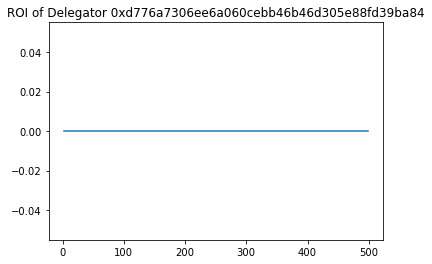

In [7]:
import matplotlib.pyplot as plt
ROI_list = []
for i, values in delegator_values_df['0xd776a7306ee6a060cebb46b46d305e88fd39ba84'].items():
    ROI_list.append(values.ROI)
plt.plot(delegator_values_df.index, ROI_list)
plt.title('ROI of Delegator 0xd776a7306ee6a060cebb46b46d305e88fd39ba84');

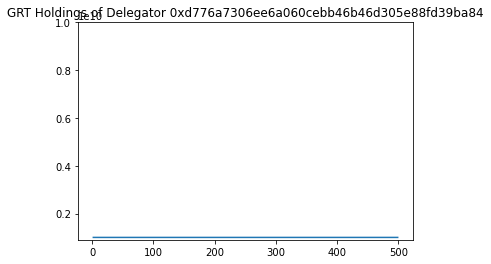

In [8]:
holdings_list = []
for i, values in delegator_values_df['0xd776a7306ee6a060cebb46b46d305e88fd39ba84'].items():
    holdings_list.append(values.holdings)
plt.plot(delegator_values_df.index, holdings_list)
plt.title('GRT Holdings of Delegator 0xd776a7306ee6a060cebb46b46d305e88fd39ba84')
plt.ylim(900000000, 10000000000);

As we set holdings at a high amount to avoid negative values, we can't really see the 160% ROI the delegator made, will be able to see this is we are able to get the actual holdings of delegators. 

In [12]:
df.tail()

,index,indexers,delegator_portfolios,block_number,simulation,subset,run,substep,timestep,cumulative_indexing_revenue,cumulative_query_revenue
495,7440,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,11550259,0,0,1,15,496,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
496,7455,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,11550672,0,0,1,15,497,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
497,7470,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,11551313,0,0,1,15,498,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
498,7485,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,11551944,0,0,1,15,499,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...
499,7500,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea':...,11552217,0,0,1,15,500,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...


In [22]:
len(df['delegator_portfolios'].loc[499])

327

In [28]:
df['delegator_portfolios'].loc[499]['0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea']